In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("Advertising.csv")  
# Data cleaning
data = data.dropna()         
data = data.drop_duplicates() 
pd.set_option('display.max_rows', None)
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1

In [3]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)


In [7]:
print("Predicted sales for the test data:")
print(y_pred)

Predicted sales for the test data:
[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [8]:
# Step 8: Show how each ad affects sales (super beginner-friendly)
print("\nHow advertising affects sales:")
print("TV ads increase sales by", model.coef_[0], "for each unit spent")
print("Radio ads increase sales by", model.coef_[1], "for each unit spent")
print("Newspaper ads increase sales by", model.coef_[2], "for each unit spent")



How advertising affects sales:
TV ads increase sales by 0.04684310317699042 for each unit spent
Radio ads increase sales by 0.17854434380887607 for each unit spent
Newspaper ads increase sales by 0.00258618609398899 for each unit spent


In [9]:
# Step 9: Show base sales without advertising
print(f"\nBase sales without advertising: {model.intercept_}")


Base sales without advertising: 2.907947020816433


In [10]:
# Step 10: Give a simple business tip
best_channel_index = model.coef_.argmax()
channels = ['TV', 'Radio', 'Newspaper']
best_channel = channels[best_channel_index]
print(f"\nTip: Spend more on {best_channel} ads because it increases sales the most!")



Tip: Spend more on Radio ads because it increases sales the most!


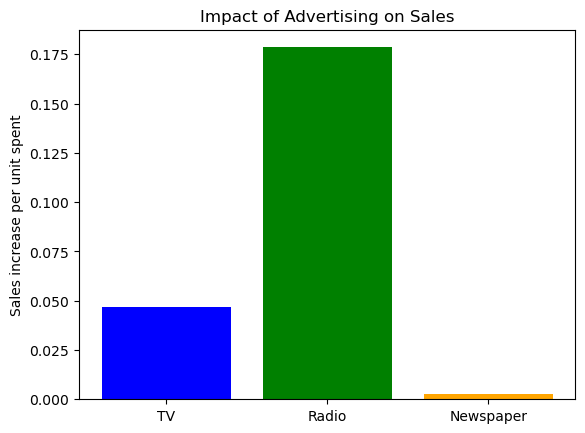

In [11]:
# Optional: simple chart to visualize impact
plt.bar(channels, model.coef_, color=['blue', 'green', 'orange'])
plt.title("Impact of Advertising on Sales")
plt.ylabel("Sales increase per unit spent")
plt.show()
